In [1]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='****',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)

cursor.execute("select * from traffic_seoul")
result = cursor.fetchall()

traffic_seoul = pd.DataFrame(result)
conn.close

<bound method CMySQLConnection.close of <mysql.connector.connection_cext.CMySQLConnection object at 0x7890aee72290>>

In [8]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='****',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)

cursor.execute("select * from seoul_수단_22to24")
result = cursor.fetchall()

person_data = pd.DataFrame(result)
conn.close()

In [11]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='****',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)

cursor.execute("select * from seoul_목적_22to24")
result = cursor.fetchall()

person_data1 = pd.DataFrame(result)
conn.close()

In [3]:
seoul_gi = traffic_seoul[(traffic_seoul['start_si'] == '서울특별시') & (traffic_seoul['end_si'] == '경기도')]
gi_seoul = traffic_seoul[(traffic_seoul['start_si'] == '경기도') & (traffic_seoul['end_si'] == '서울특별시')]
seoul_inc = traffic_seoul[(traffic_seoul['start_si'] == '서울특별시') & (traffic_seoul['end_si'] == '인천광역시')]
inc_seoul = traffic_seoul[(traffic_seoul['start_si'] == '인천광역시') & (traffic_seoul['end_si'] == '서울특별시')]
seoul = traffic_seoul[(traffic_seoul['start_si'] == '서울특별시') & (traffic_seoul['end_si'] == '서울특별시')]
inc = traffic_seoul[(traffic_seoul['start_si'] == '인천광역시') & (traffic_seoul['end_si'] == '인천광역시')]
gi = traffic_seoul[(traffic_seoul['start_si'] == '경기도') & (traffic_seoul['end_si'] == '경기도')]

/tmp/ipykernel_21148/2419813222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions, y=traffic_amounts, palette=colors)


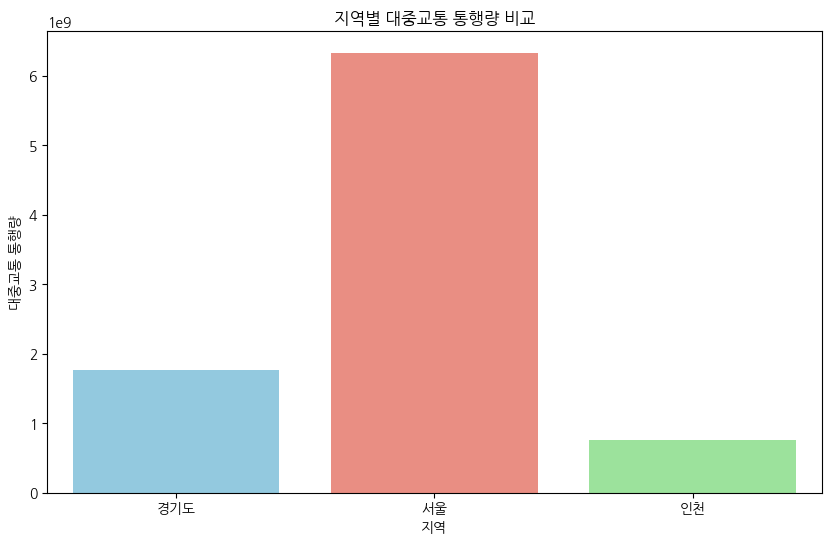

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

regions = ['경기도', '서울', '인천']
traffic_amounts = [gi['traffic'].sum(), seoul['traffic'].sum(), inc['traffic'].sum()]
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(10, 6))
sns.barplot(x=regions, y=traffic_amounts, palette=colors)
plt.title('지역별 대중교통 통행량 비교')
plt.xlabel('지역')
plt.ylabel('대중교통 통행량')
plt.show()

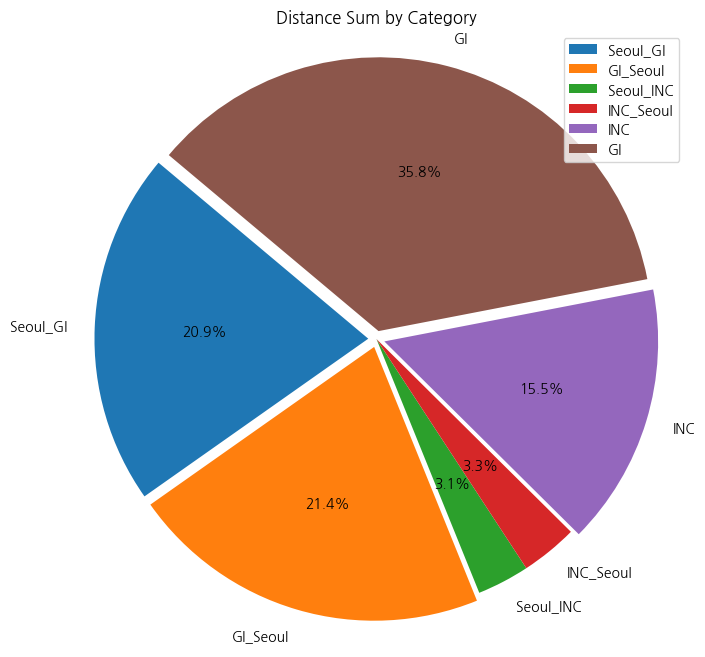

In [6]:
labels = ['Seoul_GI', 'GI_Seoul', 'Seoul_INC', 'INC_Seoul', 'INC', 'GI']
values = [seoul_gi['traffic'].sum(), gi_seoul['traffic'].sum(), seoul_inc['traffic'].sum(), inc_seoul['traffic'].sum(), inc['traffic'].sum(), gi['traffic'].sum()]

explode = [0.03, 0.03, 0, 0, 0.03, 0.03]
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')
plt.title('Distance Sum by Category')
plt.legend(handles=patches, labels=labels, loc='upper right')
plt.show()

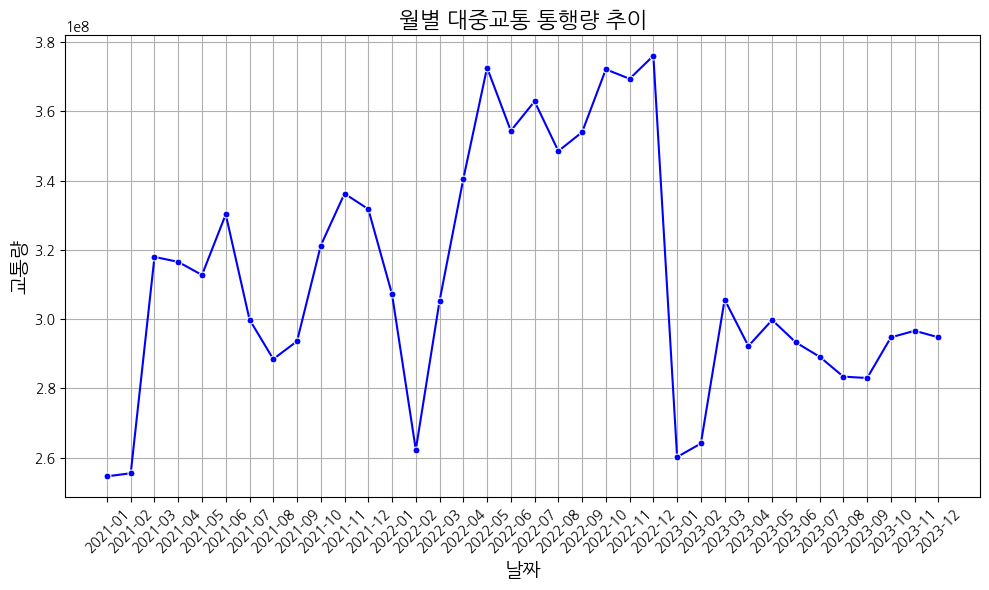

In [7]:
traffic_by_date = traffic_seoul.groupby('date')['traffic'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=traffic_by_date.index, y=traffic_by_date.values, color='blue', marker='o', markersize=5, linestyle='-')
plt.title('월별 대중교통 통행량 추이', fontsize=16)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('교통량', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

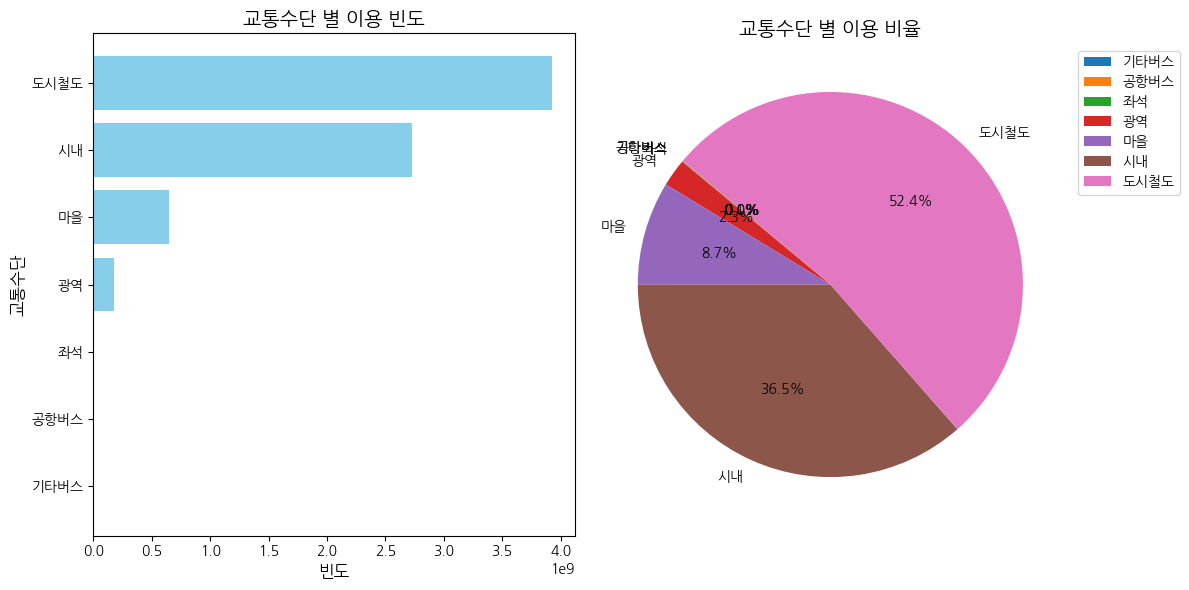

In [10]:
transport_counts = person_data.groupby('교통수단')['합계발생량'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(transport_counts.index, transport_counts.values, color='skyblue')
plt.title('교통수단 별 이용 빈도', fontsize=14)
plt.xlabel('빈도', fontsize=12)
plt.ylabel('교통수단', fontsize=12)

plt.subplot(1, 2, 2)
plt.pie(transport_counts, labels=transport_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('교통수단 별 이용 비율', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

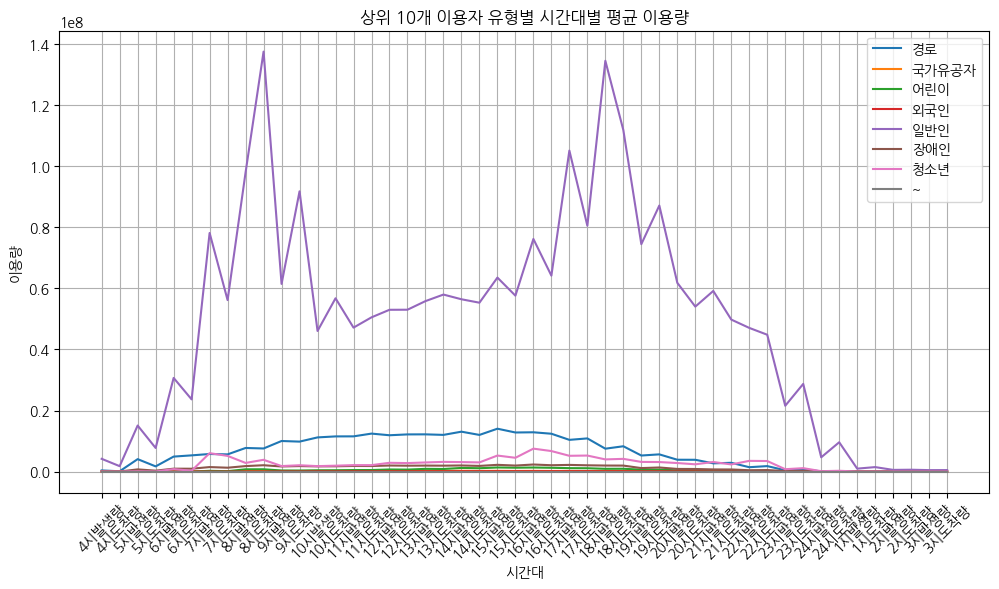

In [12]:
top_10_user_types = person_data1['이용자유형'].value_counts().head(10).index.tolist()

time_columns = ['4시발생량', '4시도착량', '5시발생량', '5시도착량', '6시발생량', '6시도착량', 
                '7시발생량', '7시도착량', '8시발생량', '8시도착량', '9시발생량', '9시도착량', 
                '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량', '12시도착량', 
                '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량', 
                '16시발생량', '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', 
                '19시발생량', '19시도착량', '20시발생량', '20시도착량', '21시발생량', '21시도착량', 
                '22시발생량', '22시도착량', '23시발생량', '23시도착량', '24시발생량', '24시도착량', 
                '1시발생량', '1시도착량', '2시발생량', '2시도착량', '3시발생량', '3시도착량']

plt.figure(figsize=(12, 6))
for user_type in top_10_user_types:
    user_data = person_data1[person_data1['이용자유형'] == user_type]
    plt.plot(time_columns, user_data[time_columns].mean(), label=user_type)

plt.xlabel('시간대')
plt.ylabel('이용량')
plt.title('상위 10개 이용자 유형별 시간대별 평균 이용량')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import pandas as pd
import os
df_bycicle = pd.DataFrame()
start_date = pd.Timestamp('2024-01-03')
end_date = pd.Timestamp('2024-01-31')
date_range = pd.date_range(start=start_date, end=end_date)
for date in date_range:
    file_path = f"../data/tpss_bcycl_od_statnhm_{date.strftime('%Y%m%d')}.csv"
    if os.path.exists(file_path):
        df_temp = pd.read_csv(file_path, encoding='cp949')
        df_bycicle = pd.concat([df_bycicle, df_temp], ignore_index=True)

In [15]:
df_bycicle_id = pd.read_csv("../data/서울시 따릉이대여소 마스터 정보.csv", encoding = 'cp949')

In [16]:
df_A = df_bycicle_id.drop(columns = ['주소2'])
df_A = df_A.rename(columns = {'대여소_ID' : '시작 대여소', '주소1' : '시작 주소', '위도' : '시작 위도', '경도' : '시작 경도'})

In [17]:
df_B = df_bycicle_id.drop(columns = ['주소2'])
df_B = df_B.rename(columns = {'대여소_ID' : '종료 대여소', '주소1' : '종료 주소', '위도' : '종료 위도', '경도' : '종료 경도'})

In [18]:
df_start = pd.merge(df_bycicle, df_A, how='left', left_on='시작_대여소_ID', right_on='시작 대여소')
df_bycicle_total = pd.merge(df_start, df_B, how='left', left_on='시작_대여소_ID', right_on='종료 대여소')

In [19]:
df_bycicle_total = df_bycicle_total.rename(columns = {'기준_날짜' : '날짜', '집계_기준' : '기준', '기준_시간대' : '시간대', '시작_대여소_ID' : '시작 대여소 ID', '시작_대여소명' : '삭제1', 
                                '종료_대여소_ID' : '종료 대여소 ID', '종료_대여소명' : '삭제2', '전체_건수' : '건수', '전체_이용_분' : '이용시간', '전체_이용_거리' : '이용거리',
                                '시작 대여소' : '삭제3', '종료 대여소' : '삭제4'})
df_bycicle_total = df_bycicle_total.drop(columns = ['삭제1', '삭제2', '삭제3', '삭제4'])

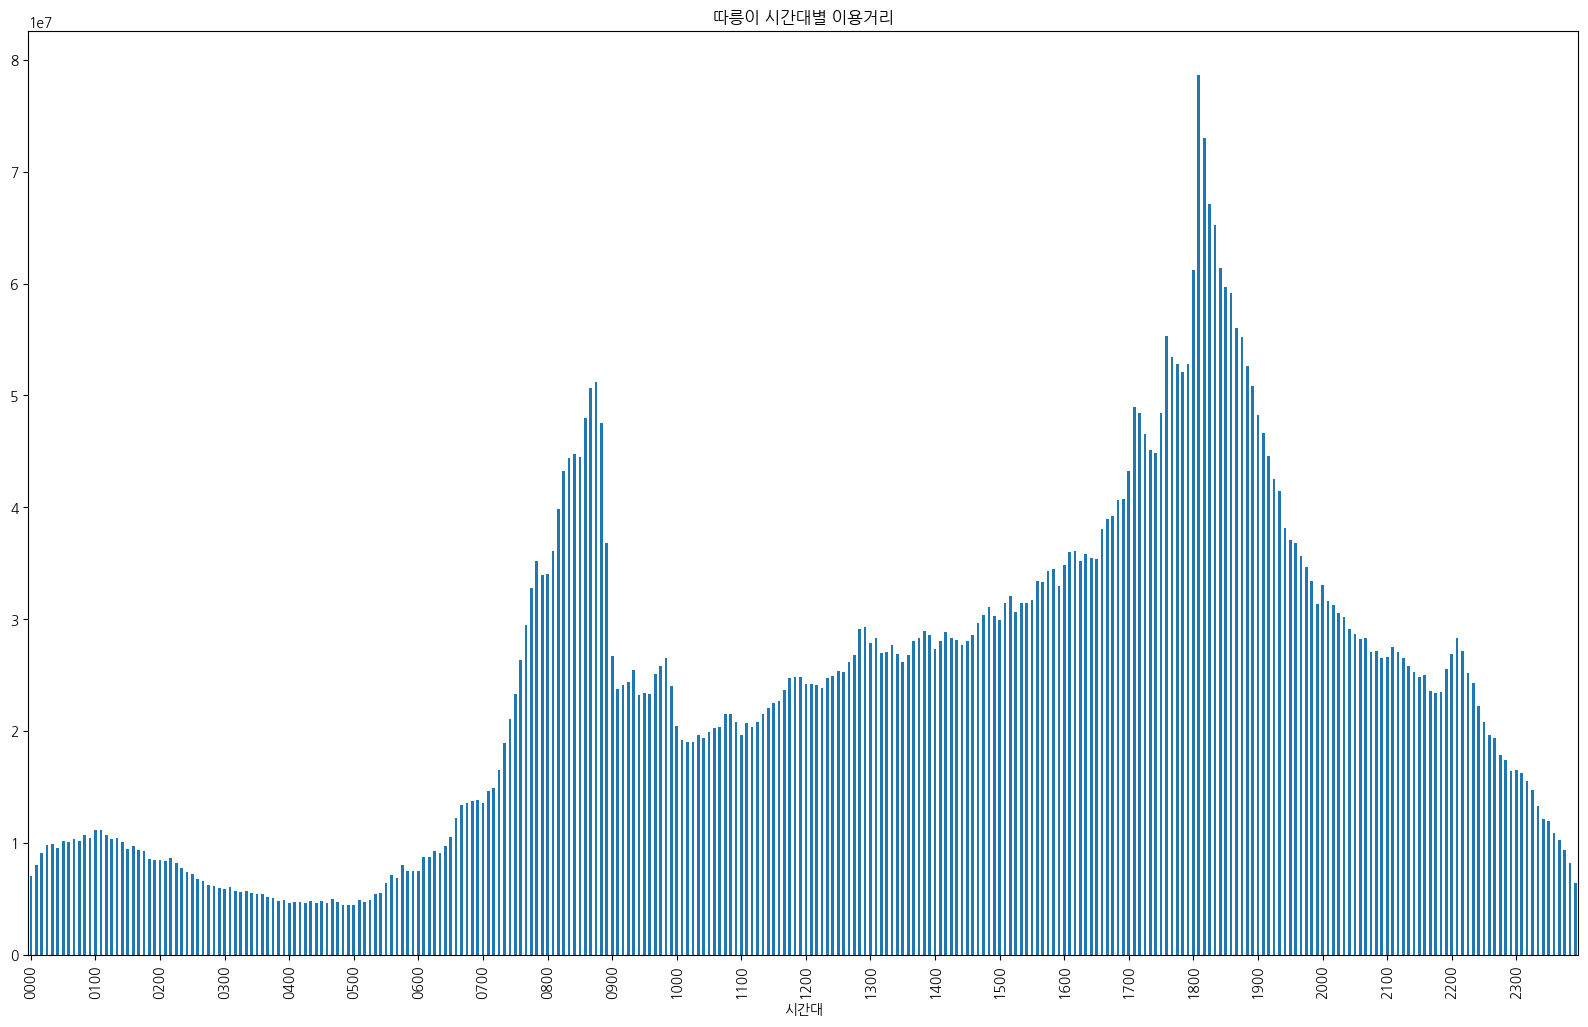

In [20]:
ax = df_bycicle_total.groupby("시간대")["이용거리"].sum().plot(kind='bar', figsize=(20, 12))

custom_ticks = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180,
                192, 204, 216, 228, 240, 252, 264, 276]
custom_labels = ['0000', '0100', '0200', '0300', '0400', '0500', '0600', '0700', '0800',
                 '0900', '1000', '1100', '1200', '1300', '1400', '1500', '1600', '1700',
                 '1800', '1900', '2000', '2100', '2200', '2300']
plt.xticks(custom_ticks, custom_labels, rotation=90)
plt.title('따릉이 시간대별 이용거리')
plt.show()

In [21]:
df_bycicle_total['시각'] = (df_bycicle_total['시간대'] // 100) % 24
df_bycicle_total.loc[df_bycicle_total['시간대'] % 100 <= 55, '시각'] -= 0
df_bycicle_total['시각'] = (df_bycicle_total['시각'] + 24) % 24

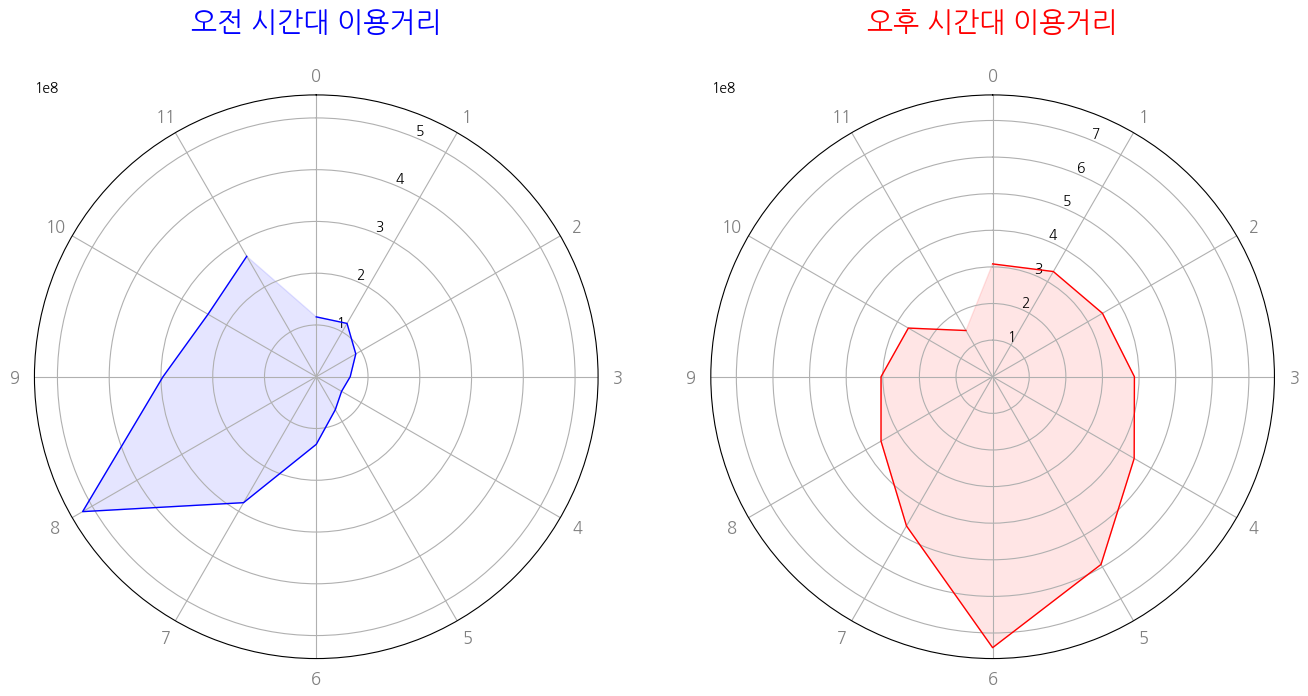

In [37]:
import numpy as np

morning_data = df_bycicle_total[df_bycicle_total['시각'].isin(range(0, 12))].groupby('시각')['이용거리'].sum()
afternoon_data = df_bycicle_total[df_bycicle_total['시각'].isin(range(12, 24))].groupby('시각')['이용거리'].sum()

morning_angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).tolist()
afternoon_angles = np.linspace(0, 2 * np.pi, 12, endpoint=False).tolist()

fig, axs = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))

if not morning_data.empty:
    axs[0].plot(morning_angles, morning_data, linewidth=1, linestyle='solid', color='blue')
    axs[0].fill(morning_angles, morning_data, color='blue', alpha=0.1)
    axs[0].set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    axs[0].set_xticklabels(range(12), color='grey', size=12)
    axs[0].set_theta_direction(-1)
    axs[0].set_theta_zero_location('N')
    axs[0].set_title('오전 시간대 이용거리', size=20, color='blue', y=1.1)

if not afternoon_data.empty:
    axs[1].plot(afternoon_angles, afternoon_data, linewidth=1, linestyle='solid', color='red')
    axs[1].fill(afternoon_angles, afternoon_data, color='red', alpha=0.1)
    axs[1].set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    axs[1].set_xticklabels(range(12), color='grey', size=12)
    axs[1].set_theta_direction(-1)
    axs[1].set_theta_zero_location('N')
    axs[1].set_title('오후 시간대 이용거리', size=20, color='red', y=1.1)

plt.show()